# Анализ датасета 'Students Performance in Exams'

In [873]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
exams = pd.read_csv('exams.csv')
exams.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,some high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associate's degree,standard,completed,78,73,68


In [874]:
exams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [875]:
exams['race/ethnicity'].unique()

array(['group A', 'group D', 'group E', 'group B', 'group C'],
      dtype=object)

In [876]:
exams['parental level of education'].unique()

array(['high school', 'some high school', 'some college',
       "associate's degree", "bachelor's degree", "master's degree"],
      dtype=object)

In [877]:
exams['lunch'].unique()

array(['standard', 'free/reduced'], dtype=object)

In [878]:
exams['test preparation course'].unique()

array(['completed', 'none'], dtype=object)

#### Переназовем колонки с английского языка на русский язык для удобства

In [879]:
exams.rename (columns = {'gender': 'Пол', 
                         'race/ethnicity': 'Раса/Этническая принадлежность',
                         'parental level of education': 'Уровень образования родителей',
                         'lunch': 'Обед',
                         'test preparation course': 'Курс подготовки к тестам',
                         'math score': 'Баллы по математике',
                         'reading score': 'Баллы по чтению',
                         'writing score': 'Баллы по письменности'}, inplace = True)

In [880]:
exams.columns

Index(['Пол', 'Раса/Этническая принадлежность',
       'Уровень образования родителей', 'Обед', 'Курс подготовки к тестам',
       'Баллы по математике', 'Баллы по чтению', 'Баллы по письменности'],
      dtype='object')

In [881]:
exams.describe()

,Баллы по математике,Баллы по чтению,Баллы по письменности
count,1000.000000,1000.000000,1000.000000
mean,66.396000,69.002000,67.738000
std,15.402871,14.737272,15.600985
min,13.000000,27.000000,23.000000
25%,56.000000,60.000000,58.000000
50%,66.500000,70.000000,68.000000
75%,77.000000,79.000000,79.000000
max,100.000000,100.000000,100.000000


#### Всего 1000 учеников

#### Максимальный полученный балл по всем предметам - 100. Средний балл по математике - 66, по чтению - 69, по письменности - 68. Минимальные баллы: 13 (математика), 27 (чтение), 23 (письменность).

In [882]:
import matplotlib.pyplot as plt

<AxesSubplot:title={'center':'Раса/Этническая принадлежность'}>

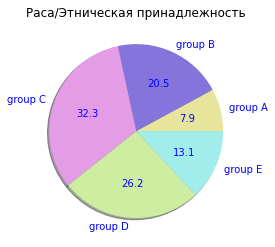

In [883]:
colors = ['#E7E59C', '#8574DB', '#E49CE7', '#CDEDA1', '#A1EDEB']
exams.groupby('Раса/Этническая принадлежность').size().plot(kind = 'pie', ylabel = '', colors=colors, shadow = True, title = 'Раса/Этническая принадлежность', autopct = '%.1f', textprops = {'color': 'b'})

#### Эта круговая диаграмма показывает, что в группе C больше всего людей (32,3 %). Меньше всего людей в группе A (7,9 %).

<AxesSubplot:title={'center':'Уровень образования родителей'}>

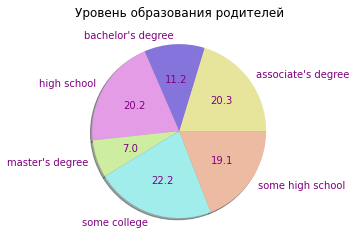

In [884]:
colors = ['#E7E59C', '#8574DB', '#E49CE7', '#CDEDA1', '#A1EDEB', '#EDBBA1']
exams.groupby('Уровень образования родителей').size().plot(kind = 'pie', ylabel = '', colors=colors, shadow = True, title = 'Уровень образования родителей', autopct = '%.1f', textprops = {'color': 'purple'})

#### Эта круговая диаграмма показывает, что больше всего родителей, учившихся в колледже. Меньше всего родителей, которые закончили магистратуру.

#### Найдем студентов, которые лучше всего справились со всеми экзаменами

In [885]:
exams.sort_values(by=['Баллы по математике', 'Баллы по чтению', 'Баллы по письменности'], ascending = [False, False, False])

,Пол,Раса/Этническая принадлежность,Уровень образования родителей,Обед,Курс подготовки к тестам,Баллы по математике,Баллы по чтению,Баллы по письменности
148,female,group E,bachelor's degree,standard,completed,100,100,100
281,male,group E,associate's degree,standard,completed,100,100,100
550,female,group E,some college,standard,completed,100,100,100
634,female,group D,master's degree,standard,completed,100,100,100
825,male,group E,associate's degree,standard,completed,100,100,100
...,...,...,...,...,...,...,...,...
496,female,group B,some high school,free/reduced,none,26,34,28
729,female,group B,some high school,free/reduced,none,25,36,37
18,female,group C,associate's degree,free/reduced,none,23,44,44
832,female,group D,some college,free/reduced,none,13,36,37


In [886]:
exams[(exams['Баллы по математике'] == 100) & (exams['Баллы по чтению'] == 100) & (exams['Баллы по письменности'] == 100)]

,Пол,Раса/Этническая принадлежность,Уровень образования родителей,Обед,Курс подготовки к тестам,Баллы по математике,Баллы по чтению,Баллы по письменности
148,female,group E,bachelor's degree,standard,completed,100,100,100
281,male,group E,associate's degree,standard,completed,100,100,100
550,female,group E,some college,standard,completed,100,100,100
634,female,group D,master's degree,standard,completed,100,100,100
825,male,group E,associate's degree,standard,completed,100,100,100


#### Всего 5 учеников сдали все 3 экзамена на максимальный балл. Среди этих учеников больше девушек (3 против 2). 4 из 5 учеников принадлежат к расе/этнической группе E. Все ученики получали стандартный обед и проходили курс подготовки к тестам. 

#### Создаем новую переменную с суммой всех баллов за 3 предмета

In [887]:
exams['Итоговые баллы'] = exams['Баллы по математике'] + exams['Баллы по чтению'] + exams['Баллы по письменности']

In [888]:
exams.head()

,Пол,Раса/Этническая принадлежность,Уровень образования родителей,Обед,Курс подготовки к тестам,Баллы по математике,Баллы по чтению,Баллы по письменности,Итоговые баллы
0,male,group A,high school,standard,completed,67,67,63,197
1,female,group D,some high school,free/reduced,none,40,59,55,154
2,male,group E,some college,free/reduced,none,59,60,50,169
3,male,group B,high school,standard,none,77,78,68,223
4,male,group E,associate's degree,standard,completed,78,73,68,219


#### Перекодируем столбцы Обед и Курс по подготовке к тестам в бинарные

In [889]:
exams['Обед'].apply(lambda x: 1 if x == 'standard' else 0 ).sum()

652

In [890]:
exams[exams['Обед'] == 'standard'].shape

(652, 9)

In [891]:
exams['Обед'] = exams['Обед'].apply(lambda x: 1 if x == 'standard' else 0 )

In [892]:
exams.head()

,Пол,Раса/Этническая принадлежность,Уровень образования родителей,Обед,Курс подготовки к тестам,Баллы по математике,Баллы по чтению,Баллы по письменности,Итоговые баллы
0,male,group A,high school,1,completed,67,67,63,197
1,female,group D,some high school,0,none,40,59,55,154
2,male,group E,some college,0,none,59,60,50,169
3,male,group B,high school,1,none,77,78,68,223
4,male,group E,associate's degree,1,completed,78,73,68,219


In [893]:
exams['Курс подготовки к тестам'].apply(lambda x: 1 if x == 'completed' else 0 ).sum()

335

In [894]:
exams[exams['Курс подготовки к тестам'] == 'completed'].shape

(335, 9)

In [895]:
exams['Курс подготовки к тестам'] = exams['Курс подготовки к тестам'].apply(lambda x: 1 if x == 'completed' else 0 )

In [896]:
exams.head()

,Пол,Раса/Этническая принадлежность,Уровень образования родителей,Обед,Курс подготовки к тестам,Баллы по математике,Баллы по чтению,Баллы по письменности,Итоговые баллы
0,male,group A,high school,1,1,67,67,63,197
1,female,group D,some high school,0,0,40,59,55,154
2,male,group E,some college,0,0,59,60,50,169
3,male,group B,high school,1,0,77,78,68,223
4,male,group E,associate's degree,1,1,78,73,68,219


#### Создаем переменную на основе нескольких колонок (Хорошая подготовка: оценка "хорошо" или "отлично" по всем предметам)  

In [897]:
exams['Хорошая подготовка']= np.where((exams['Баллы по математике'] >= 59) &
         (exams['Баллы по чтению'] >= 59) &
         (exams['Баллы по письменности'] >= 59), 1, 0)

In [898]:
exams.head()

,Пол,Раса/Этническая принадлежность,Уровень образования родителей,Обед,Курс подготовки к тестам,Баллы по математике,Баллы по чтению,Баллы по письменности,Итоговые баллы,Хорошая подготовка
0,male,group A,high school,1,1,67,67,63,197,1
1,female,group D,some high school,0,0,40,59,55,154,0
2,male,group E,some college,0,0,59,60,50,169,0
3,male,group B,high school,1,0,77,78,68,223,1
4,male,group E,associate's degree,1,1,78,73,68,219,1


In [899]:
exams['Хорошая подготовка'].sum()

612

## Вывод 1: 612 учеников сдали все три экзамена на оценку "хорошо" и/или "отлично"

In [900]:
exams.groupby('Пол')['Итоговые баллы'].sum()

Пол
female     99881
male      103255
Name: Итоговые баллы, dtype: int64

In [901]:
exams.groupby('Пол')['Хорошая подготовка'].value_counts()

Пол     Хорошая подготовка
female  1                     285
        0                     198
male    1                     327
        0                     190
Name: Хорошая подготовка, dtype: int64

In [902]:
exams['Пол'].value_counts()

male      517
female    483
Name: Пол, dtype: int64

In [903]:
285/483*100

59.006211180124225

In [904]:
327/517*100

63.2495164410058

##  Вывод 2: мужчины написали экзамены лучше, чем девушки:

#### Во-первых, суммарное количество баллов у мужчин больше, чем у девушек (103255 против 99881). Во-вторых, 63,25% мужчин написали все три экзамена на оценку "хорошо" и/или "отлично", а среди девушек  хорошо подготовились к экзаменам только 59,01%.

In [905]:
exams.groupby('Пол')['Хорошая подготовка'].value_counts().unstack()

Хорошая подготовка,0,1
Пол,,
female,198,285
male,190,327


<AxesSubplot:title={'center':'Хорошая подготовка по полу учеников'}, xlabel='Пол'>

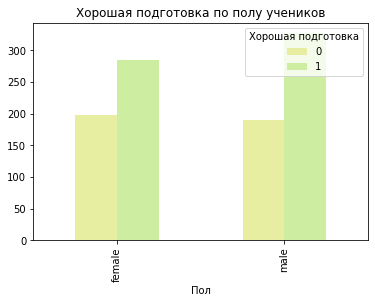

In [906]:
exams.groupby('Пол')['Хорошая подготовка'].value_counts().unstack().plot(kind = 'bar', color = ['#E7EDA1', '#CDEDA1'], title = 'Хорошая подготовка по полу учеников')


#### На столбчатой диаграмме видно, что количество мужчин, написавших на оценку "хорошо" и/или "отлично" больше, чем количество девушек. 

In [907]:
exams.pivot_table(index='Пол',
                 values=['Баллы по математике', 'Баллы по чтению', 'Баллы по письменности'],
                 aggfunc=['mean', 'median'])

mean                                        \
       Баллы по математике Баллы по письменности Баллы по чтению   
Пол                                                                
female           63.196687             71.708075       71.888199   
male             69.384913             64.029014       66.305609   

                    median                                        
       Баллы по математике Баллы по письменности Баллы по чтению  
Пол                                                               
female                  63                    72              72  
male                    70                    64              67

## Вывод 3: пол ученика влияет на результаты. Среди студентов баллы девушек в среднем выше, чем у мужчин, по письменности и по чтению. Мужчины в среднем лучше написали экзамен по математике, чем девушки.

#### Определим, насколько эффективен курс подготовки к тестам

In [908]:
exams.head()

,Пол,Раса/Этническая принадлежность,Уровень образования родителей,Обед,Курс подготовки к тестам,Баллы по математике,Баллы по чтению,Баллы по письменности,Итоговые баллы,Хорошая подготовка
0,male,group A,high school,1,1,67,67,63,197,1
1,female,group D,some high school,0,0,40,59,55,154,0
2,male,group E,some college,0,0,59,60,50,169,0
3,male,group B,high school,1,0,77,78,68,223,1
4,male,group E,associate's degree,1,1,78,73,68,219,1


In [909]:
exams.groupby(['Курс подготовки к тестам'])['Баллы по математике', 'Баллы по чтению', 'Баллы по письменности'].mean()

,Баллы по математике,Баллы по чтению,Баллы по письменности
Курс подготовки к тестам,,,
0,64.738346,66.439098,64.245113
1,69.686567,74.089552,74.671642


<AxesSubplot:title={'center':'Средняя оценка за экзамены в зависимости от прохождения курса'}>

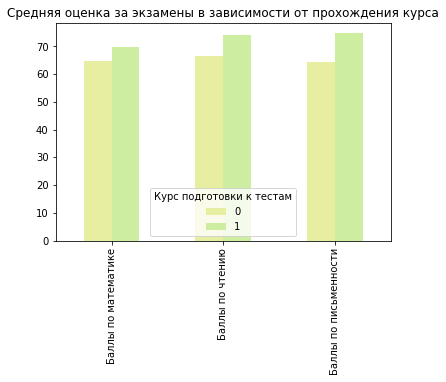

In [910]:
exams.groupby(['Курс подготовки к тестам'])['Баллы по математике', 'Баллы по чтению', 'Баллы по письменности'].mean().T.plot(kind = 'bar', color = ['#E7EDA1', '#CDEDA1'], title = 'Средняя оценка за экзамены в зависимости от прохождения курса')

## Вывод 4: оценка за экзамены зависит от прохождения курса подготовки к тестам. По всем 3 предметам средний балл выше у тех, кто проходил курс.

#### Определим, влияет ли наличие обеда на успешное написание экзаменов.

In [911]:
exams.groupby(['Обед'])['Баллы по математике', 'Баллы по чтению', 'Баллы по письменности'].mean()

,Баллы по математике,Баллы по чтению,Баллы по письменности
Обед,,,
0,58.505747,63.189655,60.925287
1,70.607362,72.104294,71.374233


<AxesSubplot:title={'center':'Средняя оценка за экзамены в зависимости от наличия обеда'}>

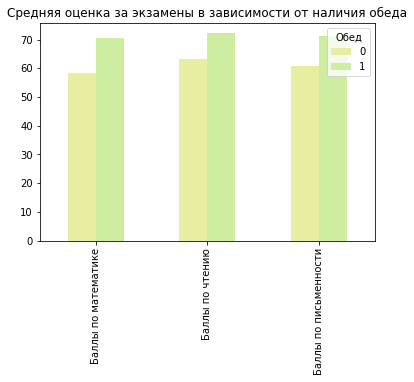

In [912]:
exams.groupby(['Обед'])['Баллы по математике', 'Баллы по чтению', 'Баллы по письменности'].mean().T.plot(kind = 'bar', color = ['#E7EDA1', '#CDEDA1'], title = 'Средняя оценка за экзамены в зависимости от наличия обеда')

## Вывод 5: оценка за экзамены зависит от наличия обеда. По всем 3 предметам средний балл выше у тех, кто обедает стандартно.

#### Определим, влияет ли образование родителей на успешное написание экзаменов.

In [913]:
parents_score = exams.groupby(['Уровень образования родителей'])['Баллы по математике', 'Баллы по чтению', 'Баллы по письменности'].mean()

<AxesSubplot:title={'center':'Баллы за экзамены в зависимости от уровня образования родителей'}, xlabel='Уровень образования родителей'>

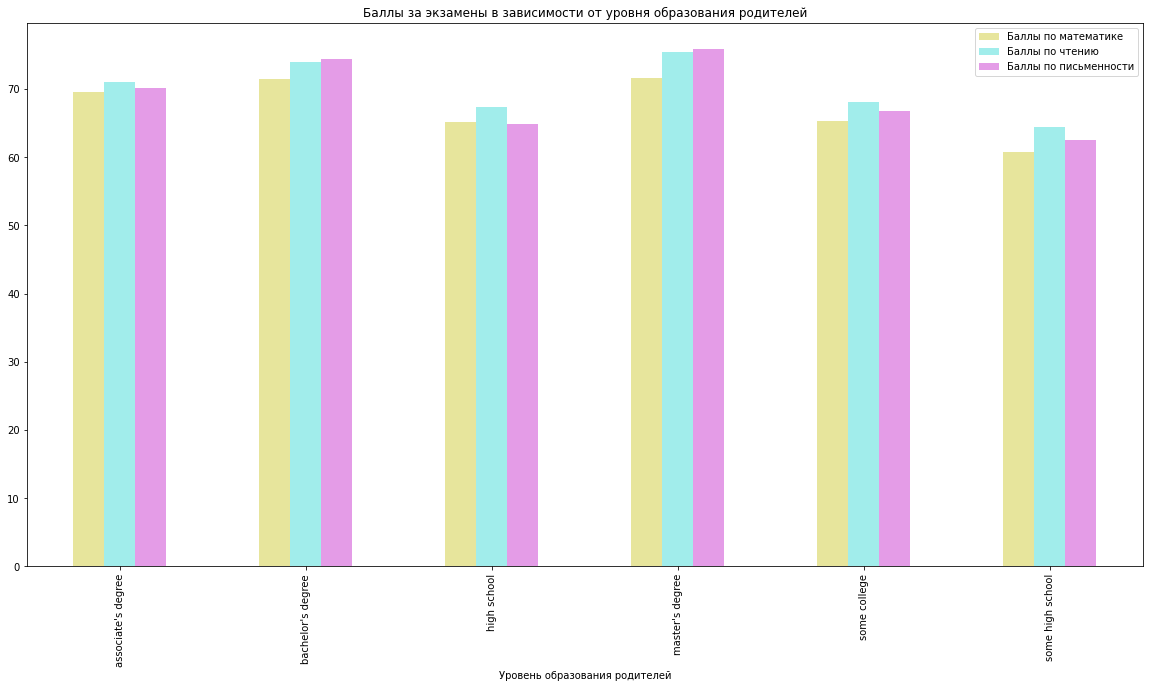

In [914]:
parents_score.plot(kind = 'bar', figsize=(20, 10), color = ['#E7E59C', '#A1EDEB', '#E49CE7'], title = 'Баллы за экзамены в зависимости от уровня образования родителей')

## Вывод 6: оценка за экзамены зависит от уровня образования родителей. На столбчатой диаграмме видно, что дети родителей, которые закончили магистратуру, написали работу лучше других. Хуже всех экзамены написали дети тех родителей, которые учились в старшей школе и не закончили её. 

#### Создадим категориальные переменные на основе количетсвенных (Баллы по математике, Баллы по чтению, Баллы по письменности).

In [915]:
def get_temp_cat(temp):
    if temp < 2:
        return 'Кол'
    elif temp < 42:
        return 'Двойка'
    elif temp < 66:
        return 'Тройка'
    elif temp < 87:
        return 'Четверка'
    elif temp >= 87:
        return 'Отлично'
    else:
        return temp

In [916]:
exams['Математика_кат'] = pd.Categorical(exams['Баллы по математике'].apply(get_temp_cat))

In [917]:
exams['Чтение_кат'] = pd.Categorical(exams['Баллы по чтению'].apply(get_temp_cat))

In [918]:
exams['Письменность_кат'] = pd.Categorical(exams['Баллы по письменности'].apply(get_temp_cat))

In [919]:
exams.head()

,Пол,Раса/Этническая принадлежность,Уровень образования родителей,Обед,Курс подготовки к тестам,Баллы по математике,Баллы по чтению,Баллы по письменности,Итоговые баллы,Хорошая подготовка,Математика_кат,Чтение_кат,Письменность_кат
0,male,group A,high school,1,1,67,67,63,197,1,Четверка,Четверка,Тройка
1,female,group D,some high school,0,0,40,59,55,154,0,Двойка,Тройка,Тройка
2,male,group E,some college,0,0,59,60,50,169,0,Тройка,Тройка,Тройка
3,male,group B,high school,1,0,77,78,68,223,1,Четверка,Четверка,Четверка
4,male,group E,associate's degree,1,1,78,73,68,219,1,Четверка,Четверка,Четверка


In [920]:
exams[(exams['Математика_кат'] == 'Четверка')]

,Пол,Раса/Этническая принадлежность,Уровень образования родителей,Обед,Курс подготовки к тестам,Баллы по математике,Баллы по чтению,Баллы по письменности,Итоговые баллы,Хорошая подготовка,Математика_кат,Чтение_кат,Письменность_кат
0,male,group A,high school,1,1,67,67,63,197,1,Четверка,Четверка,Тройка
3,male,group B,high school,1,0,77,78,68,223,1,Четверка,Четверка,Четверка
4,male,group E,associate's degree,1,1,78,73,68,219,1,Четверка,Четверка,Четверка
11,female,group D,high school,1,1,80,87,90,257,1,Четверка,Отлично,Отлично
12,male,group D,associate's degree,1,1,77,87,85,249,1,Четверка,Отлично,Четверка
...,...,...,...,...,...,...,...,...,...,...,...,...,...
992,male,group C,some college,1,0,69,63,66,198,1,Четверка,Тройка,Четверка
994,male,group E,high school,0,1,86,82,75,243,1,Четверка,Четверка,Четверка
995,male,group C,high school,1,0,73,70,65,208,1,Четверка,Четверка,Тройка
996,male,group D,associate's degree,0,1,85,91,92,268,1,Четверка,Отлично,Отлично


#### 431 ученик написал экзамен по математике на оценку "хорошо".

In [921]:
import scipy.stats

In [922]:
exams['z-score_maths'] = scipy.stats.zscore(exams['Баллы по математике'])

In [923]:
exams[exams['z-score_maths'] < -3]

,Пол,Раса/Этническая принадлежность,Уровень образования родителей,Обед,Курс подготовки к тестам,Баллы по математике,Баллы по чтению,Баллы по письменности,Итоговые баллы,Хорошая подготовка,Математика_кат,Чтение_кат,Письменность_кат,z-score_maths
392,female,group C,some college,0,0,13,29,23,65,0,Двойка,Двойка,Двойка,-3.468361
832,female,group D,some college,0,0,13,36,37,86,0,Двойка,Двойка,Двойка,-3.468361


#### Всего 2 студента, которые написали экзамен по математике хуже, чем 3 стандратных отклонения. 

In [924]:
exams.groupby('Курс подготовки к тестам')['z-score_maths'].mean()

Курс подготовки к тестам
0   -0.107674
1    0.213740
Name: z-score_maths, dtype: float64

#### В среднем ученики, которые не брали курс по подготовке к тестам, сдали экзамен по математике ниже среднего, а те, кто брали - выше среднего.  

In [925]:
exams.groupby('Обед')['z-score_maths'].mean()

Обед
0   -0.512515
1    0.273551
Name: z-score_maths, dtype: float64

#### В среднем ученики, которые не брали стандартный обед, сдали экзамен по математике ниже среднего, а те, кто брали - выше среднего.

In [926]:
exams['z-score_read'] = scipy.stats.zscore(exams['Баллы по чтению'])

In [927]:
exams[exams['z-score_read'] < -3]

,Пол,Раса/Этническая принадлежность,Уровень образования родителей,Обед,Курс подготовки к тестам,Баллы по математике,Баллы по чтению,Баллы по письменности,Итоговые баллы,Хорошая подготовка,Математика_кат,Чтение_кат,Письменность_кат,z-score_maths,z-score_read


#### Нет учеников, которые написали экзамен по чтению хуже, чем 3 стандратных отклонения. 

In [928]:
exams.groupby('Курс подготовки к тестам')['z-score_read'].mean()

Курс подготовки к тестам
0   -0.173993
1    0.345389
Name: z-score_read, dtype: float64

#### В среднем ученики, которые не брали курс по подготовке к тестам, сдали экзамен по чтению ниже среднего, а те, кто брали - выше среднего

In [929]:
exams.groupby('Обед')['z-score_read'].mean()

Обед
0   -0.394595
1    0.210612
Name: z-score_read, dtype: float64

#### В среднем ученики, которые не брали стандратный обед, сдали экзамен по чтению ниже среднего, а те, кто брали - выше среднего

In [930]:
exams['z-score_write'] = scipy.stats.zscore(exams['Баллы по письменности'])

In [931]:
exams[exams['z-score_write'] < -3]

,Пол,Раса/Этническая принадлежность,Уровень образования родителей,Обед,Курс подготовки к тестам,Баллы по математике,Баллы по чтению,Баллы по письменности,Итоговые баллы,Хорошая подготовка,Математика_кат,Чтение_кат,Письменность_кат,z-score_maths,z-score_read,z-score_write


#### Нет учеников, которые написали экзамен по письменности хуже, чем 3 стандратных отклонения.

In [932]:
exams.groupby('Курс подготовки к тестам')['z-score_write'].mean()

Курс подготовки к тестам
0   -0.224001
1    0.444659
Name: z-score_write, dtype: float64

#### В среднем ученики, которые не брали курс по подготовке к тестам, сдали экзамен по письменности ниже среднего, а те, кто брали - выше среднего.

In [933]:
exams.groupby('Обед')['z-score_write'].mean()

Обед
0   -0.436903
1    0.233194
Name: z-score_write, dtype: float64

#### В среднем ученики, которые не брали стандратный обед, сдали экзамен по письменности ниже среднего, а те, кто брали - выше среднего.

## Вывод 7: ученики, которые брали курсы по подготовке к тестам и стандратно обедали, в среднем написали экзамен лучше тех, кто не проходил курс и не брал стандратный обед. 

In [934]:
math = exams['Баллы по математике']
read = exams['Баллы по чтению']
write = exams['Баллы по письменности']

In [935]:
exams_new = pd.concat([math, read, write], axis=1)
exams_new

,Баллы по математике,Баллы по чтению,Баллы по письменности
0,67,67,63
1,40,59,55
2,59,60,50
3,77,78,68
4,78,73,68
...,...,...,...
995,73,70,65
996,85,91,92
997,32,35,41
998,73,74,82


In [936]:
exams_new.corr()

,Баллы по математике,Баллы по чтению,Баллы по письменности
Баллы по математике,1.000000,0.819398,0.805944
Баллы по чтению,0.819398,1.000000,0.954274
Баллы по письменности,0.805944,0.954274,1.000000


#### Корреляция между баллами по чтению и баллами по математике - высокая. Корреляция между баллами по письменности и баллами по математике - высокая. Корреляция между баллами по письменности и баллами по чтению - весьма высокая (сильная). 

<AxesSubplot:title={'center':'График рассеивания: математика и чтение'}, xlabel='Баллы по математике', ylabel='Баллы по чтению'>

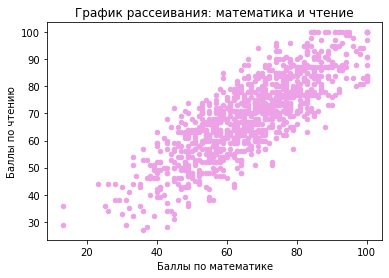

In [937]:
exams_new.plot('Баллы по математике', 'Баллы по чтению', kind = 'scatter', c = '#EDA1E6', title = 'График рассеивания: математика и чтение')

<AxesSubplot:title={'center':'График рассеивания: математика и письменность'}, xlabel='Баллы по математике', ylabel='Баллы по письменности'>

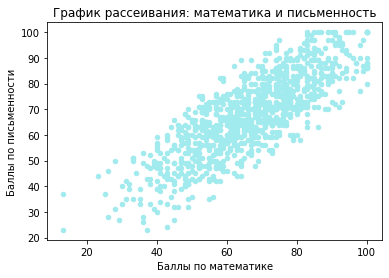

In [938]:
exams_new.plot('Баллы по математике', 'Баллы по письменности', kind = 'scatter', c = '#A1EAED', title = 'График рассеивания: математика и письменность')

<AxesSubplot:title={'center':'График рассеивания: чтение и письменность'}, xlabel='Баллы по чтению', ylabel='Баллы по письменности'>

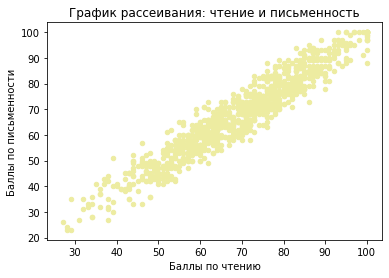

In [939]:
exams_new.plot('Баллы по чтению', 'Баллы по письменности', kind = 'scatter', c = '#EDECA1', title = 'График рассеивания: чтение и письменность')

## Вывод 8: баллы за экзамены имеют высокую корреляцию. Наиболее сильная связь между баллами по чтению и баллами по письменности (сильная связь). 

In [940]:
group = exams.groupby(exams['Раса/Этническая принадлежность'])['Баллы по математике', 'Баллы по чтению', 'Баллы по письменности'].mean()

<AxesSubplot:title={'center':'Баллы за экзамены в зависимости от этнической принадлежности'}, xlabel='Раса/Этническая принадлежность'>

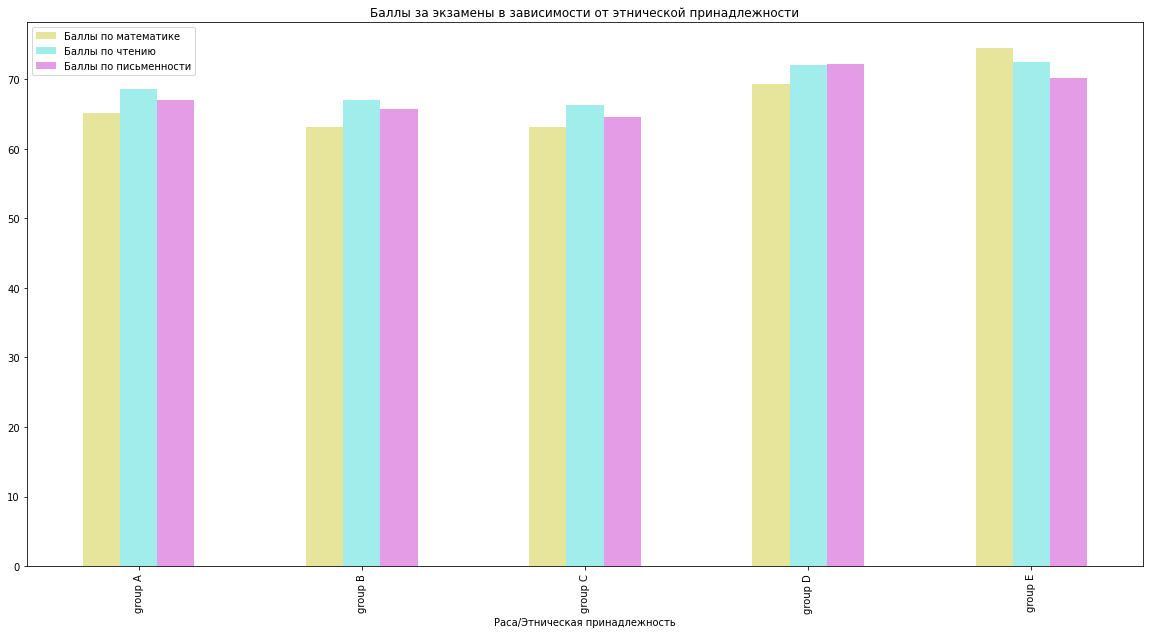

In [941]:
group.plot(kind = 'bar', figsize=(20, 10), color = ['#E7E59C', '#A1EDEB', '#E49CE7'], title = 'Баллы за экзамены в зависимости от этнической принадлежности')


Text(0.5, 0.98, 'Баллы по математике в разных этнических группах')

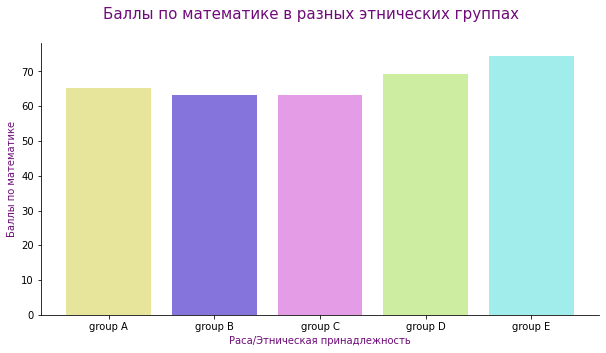

In [942]:
fig, ax = plt.subplots(figsize = (10,5))
ax.bar(group.index, group['Баллы по математике'], color = ['#E7E59C', '#8574DB', '#E49CE7', '#CDEDA1', '#A1EDEB'])
ax.set_xlabel('Раса/Этническая принадлежность', c = '#6F0C7A')
ax.set_ylabel('Баллы по математике', c = '#6F0C7A')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
fig.suptitle('Баллы по математике в разных этнических группах', fontsize=15, c = '#6F0C7A')

Text(0.5, 0.98, 'Баллы по чтению в разных этнических группах')

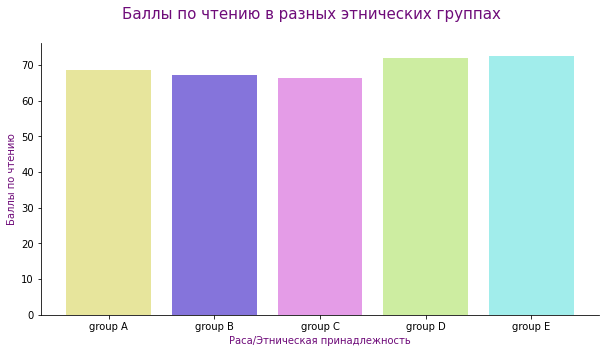

In [943]:
fig, ax = plt.subplots(figsize = (10,5))
ax.bar(group.index, group['Баллы по чтению'], color = ['#E7E59C', '#8574DB', '#E49CE7', '#CDEDA1', '#A1EDEB'])
ax.set_xlabel('Раса/Этническая принадлежность', c = '#6F0C7A')
ax.set_ylabel('Баллы по чтению', c = '#6F0C7A')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
fig.suptitle('Баллы по чтению в разных этнических группах', fontsize=15, c = '#6F0C7A')

Text(0.5, 0.98, 'Баллы по письменности в разных этнических группах')

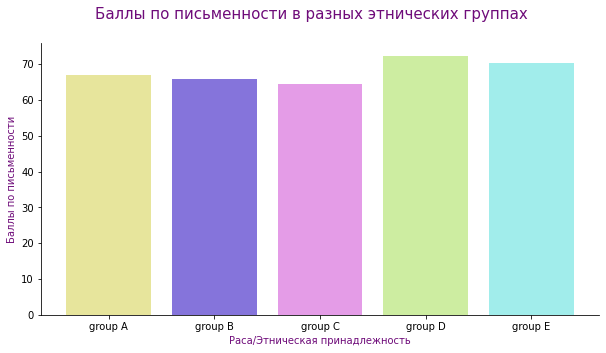

In [944]:
fig, ax = plt.subplots(figsize = (10,5))
ax.bar(group.index, group['Баллы по письменности'], color = ['#E7E59C', '#8574DB', '#E49CE7', '#CDEDA1', '#A1EDEB'])
ax.set_xlabel('Раса/Этническая принадлежность', c = '#6F0C7A')
ax.set_ylabel('Баллы по письменности', c = '#6F0C7A')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
fig.suptitle('Баллы по письменности в разных этнических группах', fontsize=15, c = '#6F0C7A')

## Вывод 9: ученики из группы E лучше всего справились с экзаменами по математике и чтению. Ученики из группы D лучше всего справились с экзаменом по письменности. Ученики из группы C хуже всего справились со всеми тремя экзаменами.

# Общий вывод: для того, чтобы улучшить баллы за экзамены, ученикам нужно брать курс подготовки к тестами и брать стандартный обед. Кроме того, ученикам рекомендовано задуматься о дальнейшем образовании, так как оно может повлиять на успеваемость их детей. Преподавателям рекомендовано избегать расовой дискриминации и уделять всем ученикам одинаковое внимание. Если расовой дискриминации нет, возможно недопонимание в процессе обучения со стороны некоторых этнических групп. В таком случае, им нужно приложить бОльшие усилия для освоения материала. 